# Lasso回归原理

Lasso回归，即**Least Absolute Shrinkage and Selection Operator**。Lasso回归在线性回归的基础上通过在损失函数中引入**L1正则化项**来实现回归建模。

## Lasso回归数学表达式

Lasso回归的数学表达式与多元线性回归类似，Lasso回归模型的一般形式为：
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$
其中：
- $y$是因变量（目标变量）。
- $x_1, x_2, \dots, x_p$是自变量（特征变量）。
- $\beta_0$是截距，表示当所有自变量均为零时$y$的取值。
- $\beta_1, \beta_2, \dots, \beta_p$是回归系数，表示每个自变量对因变量的线性影响。
- $\epsilon$是误差项，表示模型未解释的部分。

## Lasso回归目标函数

Lasso回归的目标函数是最小化**残差平方和**与**模型系数绝对值之和**的加权和，其数学公式如下：
$$\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 \right) + \lambda \sum_{j=1}^{p} |\beta_j|$$

其中：
- $n$是样本数量。
- $p$是特征数量。
- $y_i$是第$i$个样本的目标值。
- $x_{ij}$是第$i$个样本的第$j$个特征的值。
- $\beta_0$是截距项。
- $\beta_j$是第$j$个特征的系数。
- $\lambda$是正则化参数，控制模型复杂度和拟合度之间的权衡。

L1正则化项$\lambda \sum_{j=1}^{p} |\beta_j|$是Lasso回归的核心，其核心思想是计算模型系数的绝对值，来实现对模型参数规模的惩罚。模型参数越多，模型回归系数越大，则L1正则化惩罚越大。

## Lasso回归为什么能缓解多重共线性

### 多重共线性定义

**多重共线性**是指在回归模型中，多个自变量（特征变量）之间存在较强的线性相关性。这种相关性会导致模型系数估计的不稳定性，标准误差增大，从而使得模型的预测能力和解释能力下降（共线性特征对目标变量的贡献被“分摊”，导致系数符号或大小与预期不符）。

比如房价预测项目中，房屋面积和卧室数量这两个变量通常高度相关。银行卡违约风险人群识别项目中，收入与教育水平，这两个变量可能存在一定的线性相关性

### Lasso回归如何缓解多重共线性

**1. 稀疏性与特征选择**
- **L1正则化**：  
    - Lasso的目标函数中加入系数绝对值之和的惩罚项$\lambda \sum_{j=1}^p |\beta_j|$，迫使部分系数严格为 **0**，实现特征选择。
- **消除共线性特征**：  
     - 当多个特征高度相关时，Lasso倾向于保留其中一个（通常是对目标变量预测贡献最大的特征），而将其他共线特征的系数设为 **0**。  
     - **示例**：若特征$X_1$和$X_2$高度相关，Lasso可能只保留$X_1$，剔除$X_2$，从而直接消除共线性。

**2. 降低模型复杂度**
- **减少特征数量**：  
    - 通过将冗余特征的系数设为 0，Lasso减少了模型中的有效特征数，降低了模型复杂度。  
- **方差-偏差权衡**：  
    - 虽然Lasso引入了偏差（因系数被压缩，导致模型简化），但显著降低了模型方差（删去不重要的特征），从而缓解过拟合，提升泛化能力。  

**3. 鲁棒的特征重要性**
- **对噪声的鲁棒性**：  
    - L1正则化通过稀疏性过滤掉对目标变量贡献小的特征（可能是噪声或共线性特征），使模型更关注关键变量。  
- **解释性优势**：  
    - 稀疏模型更清晰，可直接识别对预测最重要的特征，避免共线性导致的系数方向/大小失真。

## Lasso回归的优缺点

### Lasso回归的优点

- **特征选择**：Lasso回归中的L1正则化惩罚通过将不重要的特征系数设为零，实现自动特征选择，从而简化模型并提高解释性。
- **防止过拟合，提高模型泛化能力**：L1正则化有助于减少过拟合，使模型在未见数据上表现更佳。
- **计算效率**：L1正则化通过将不重要的特征系数设为零，能够自动筛选出对预测目标变量有显著影响的特征，使得Lasso回归在处理高维数据时尤为有效。

### Lasso回归的缺点

- **对异常值敏感**：Lasso回归对异常值较为敏感，导致模型的鲁棒性不足。
- **特征数量过多时效果一般**：当特征数量$p$远大于样本数量$n$时，Lasso可能无法选择所有变量，可能导致重要变量的丢失。

# Lasso回归案例

## Lasso：
  - **alpha**：L1正则化系数，控制正则化强度
  - **random_state**：随机数种子

## 案例展示与代码实现

**make_regression**: 用于生成模拟回归数据集
  - **n_samples**: 生成的样本数量
  - **n_features**: 生成的特征数量
  - **noise**: 添加到目标变量中的噪声的标准差，noise越大则回归问题更难
  - **random_state**: 随机数种子

=== Lasso Regression Formula ===
y = 17.69 + 58.00 * X1 + 0.00 * X2 + 27.91 * X3 + 22.56 * X4 + 43.60 * X5
Lasso Root Mean Squared Error (RMSE): 120.82
Lasso R-squared (R²): 0.28

=== Linear Regression Formula ===
y = 17.71 + 40.54 * X1 + 17.27 * X2 + -144.06 * X3 + 194.79 * X4 + 43.84 * X5
Linear Root Mean Squared Error (RMSE): 120.38
Linear R-squared (R²): 0.29


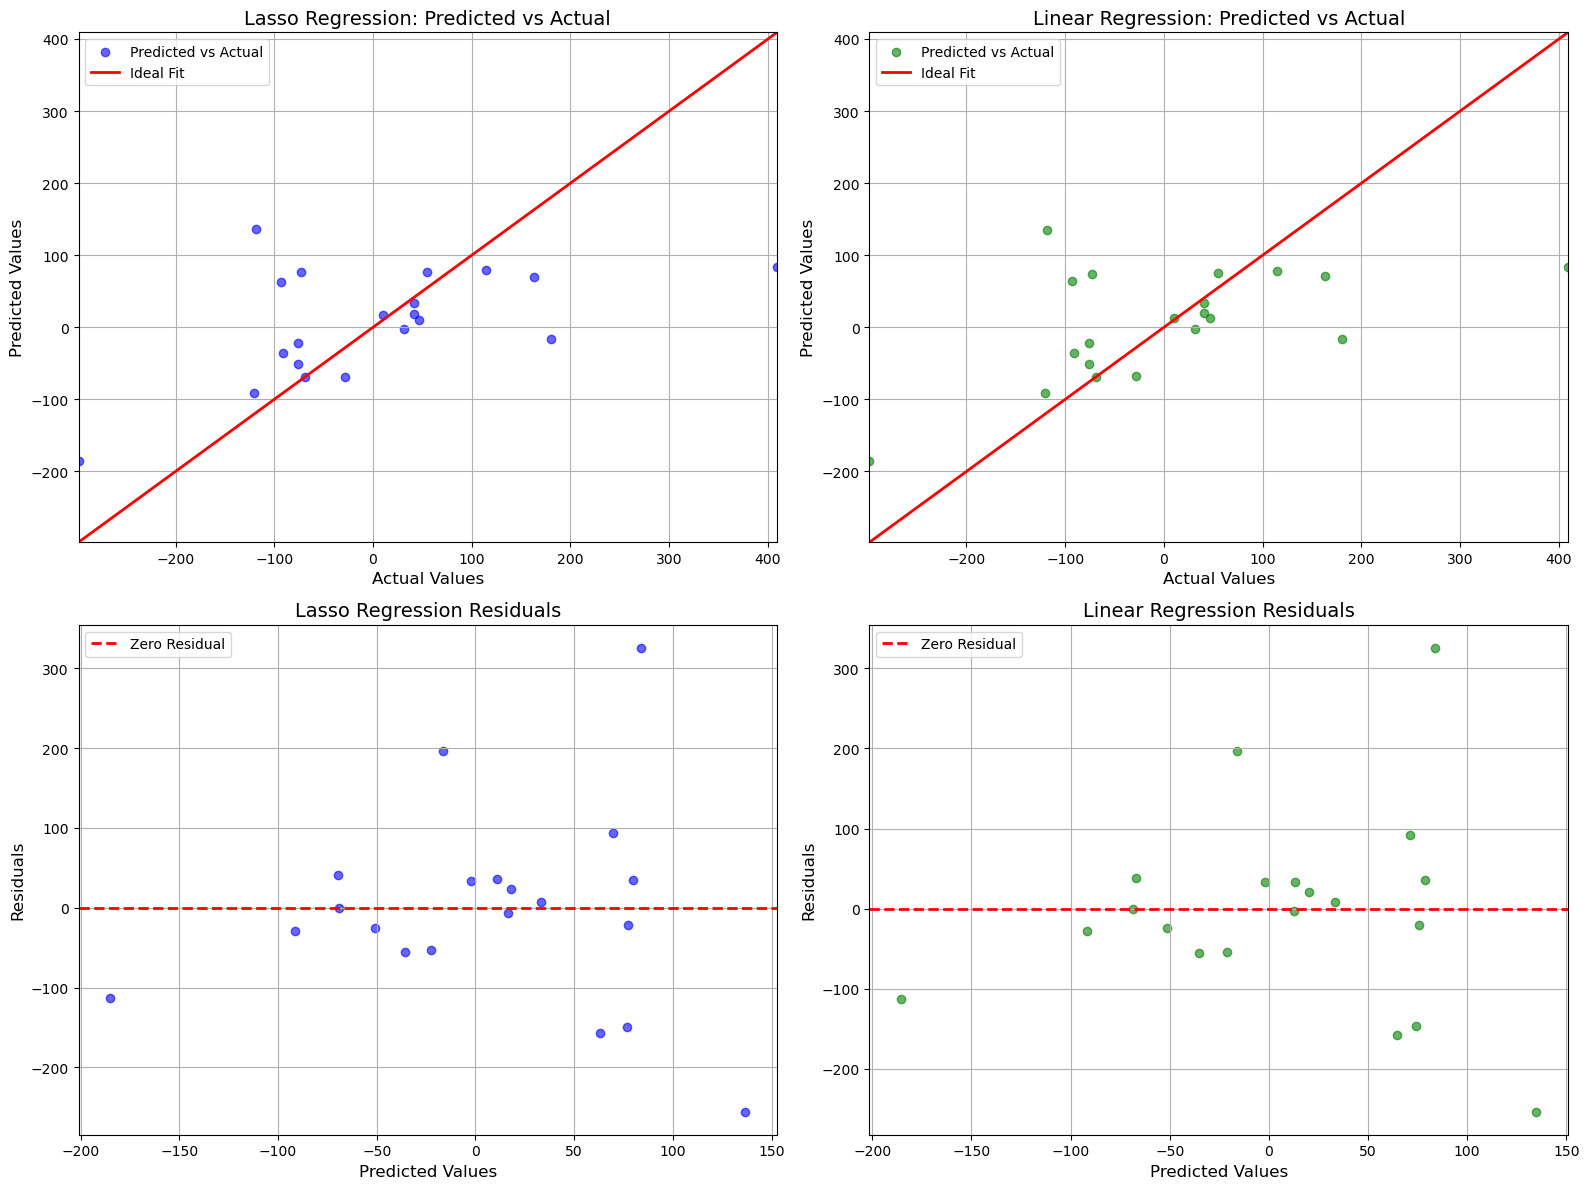

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 生成模拟数据：具有多重共线性的特征
np.random.seed(42)  # 设置随机种子，确保每次运行结果相同
n_samples, n_features = 100, 5  # 设置样本数和特征数
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=10, random_state=42)  # 生成带噪声的回归数据

# 引入多重共线性：人为让一些特征高度相关
X[:, 1] = X[:, 0] + np.random.randn(n_samples) * 0.01  # 第2列与第1列高度相关
X[:, 3] = X[:, 2] + np.random.randn(n_samples) * 0.01  # 第4列与第3列高度相关

# 数据划分：将数据集分为训练集和验证集，验证集比例为20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建Lasso回归模型并训练
lasso_model = Lasso(alpha=0.1)  # 设置正则化强度 alpha（正则化强度越大，模型的收缩越强）
lasso_model.fit(X_train, y_train)  # 训练Lasso回归模型

# Lasso回归预测
y_pred_lasso = lasso_model.predict(X_test)  # 使用Lasso回归进行预测

# 创建线性回归模型并训练
linear_model = LinearRegression()  # 创建普通线性回归模型
linear_model.fit(X_train, y_train)  # 训练线性回归模型

# 线性回归预测
y_pred_linear = linear_model.predict(X_test)  # 使用线性回归进行预测

# 模型性能评估
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # 计算Lasso回归的RMSE
r2_lasso = r2_score(y_test, y_pred_lasso)  # 计算Lasso回归的R²

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # 计算线性回归的RMSE
r2_linear = r2_score(y_test, y_pred_linear)  # 计算线性回归的R²

# 获取Lasso回归和线性回归的回归公式
lasso_coefficients = lasso_model.coef_  # 获取Lasso回归的系数
lasso_intercept = lasso_model.intercept_  # 获取Lasso回归的截距
lasso_formula = f"y = {lasso_intercept:.2f} + " + " + ".join([f"{lasso_coefficients[i]:.2f} * X{i+1}" for i in range(len(lasso_coefficients))])  # 构建Lasso回归的回归公式

linear_coefficients = linear_model.coef_  # 获取线性回归的系数
linear_intercept = linear_model.intercept_  # 获取线性回归的截距
linear_formula = f"y = {linear_intercept:.2f} + " + " + ".join([f"{linear_coefficients[i]:.2f} * X{i+1}" for i in range(len(linear_coefficients))])  # 构建线性回归的回归公式

# 打印回归公式和模型性能
print("=== Lasso Regression Formula ===")
print(lasso_formula)  # 打印Lasso回归的回归公式
print(f"Lasso Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")  # 打印Lasso回归的RMSE
print(f"Lasso R-squared (R²): {r2_lasso:.2f}")  # 打印Lasso回归的R²

print("\n=== Linear Regression Formula ===")
print(linear_formula)  # 打印线性回归的回归公式
print(f"Linear Root Mean Squared Error (RMSE): {rmse_linear:.2f}")  # 打印线性回归的RMSE
print(f"Linear R-squared (R²): {r2_linear:.2f}")  # 打印线性回归的R²

# 计算残差（实际值 - 预测值）
residuals_lasso = y_test - y_pred_lasso  # 计算Lasso回归的残差
residuals_linear = y_test - y_pred_linear  # 计算线性回归的残差

# 可视化对比（包含残差图）
plt.figure(figsize=(16, 12))  # 设置图形的大小

# --- Lasso回归预测图 ---
plt.subplot(2, 2, 1)  # 创建一个2x2的子图，当前绘制第1个子图
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color="blue", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（对角线）
plt.title("Lasso Regression: Predicted vs Actual", fontsize=14)  # 设置标题
plt.xlabel("Actual Values", fontsize=12)  # 设置x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # 设置y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.xlim(y_test.min(), y_test.max())  # 设置x轴范围
plt.ylim(y_test.min(), y_test.max())  # 设置y轴范围

# --- 线性回归预测图 ---
plt.subplot(2, 2, 2)  # 创建一个2x2的子图，当前绘制第2个子图
plt.scatter(y_test, y_pred_linear, alpha=0.6, color="green", label="Predicted vs Actual")  # 绘制实际值与预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Ideal Fit")  # 绘制理想拟合线（对角线）
plt.title("Linear Regression: Predicted vs Actual", fontsize=14)  # 设置标题
plt.xlabel("Actual Values", fontsize=12)  # 设置x轴标签
plt.ylabel("Predicted Values", fontsize=12)  # 设置y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.xlim(y_test.min(), y_test.max())  # 设置x轴范围
plt.ylim(y_test.min(), y_test.max())  # 设置y轴范围

# --- Lasso回归残差图 ---
plt.subplot(2, 2, 3)  # 创建一个2x2的子图，当前绘制第3个子图
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.6, color="blue")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的水平线
plt.title("Lasso Regression Residuals", fontsize=14)  # 设置标题
plt.xlabel("Predicted Values", fontsize=12)  # 设置x轴标签
plt.ylabel("Residuals", fontsize=12)  # 设置y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

# --- 线性回归残差图 ---
plt.subplot(2, 2, 4)  # 创建一个2x2的子图，当前绘制第4个子图
plt.scatter(y_pred_linear, residuals_linear, alpha=0.6, color="green")  # 绘制预测值与残差的散点图
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residual")  # 绘制残差为零的水平线
plt.title("Linear Regression Residuals", fontsize=14)  # 设置标题
plt.xlabel("Predicted Values", fontsize=12)  # 设置x轴标签
plt.ylabel("Residuals", fontsize=12)  # 设置y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.tight_layout()  # 调整子图的布局
plt.show()  # 显示图形


## 结果分析

- **Lasso公式**
$$y = 17.69 + 58 * X1 + 0 * X2 + 27.91 * X3 + 22.56 * X4 + 43.60 * X5$$
    - RMSE (均方根误差): 120.82
    - R² (决定系数): 0.28  
- **线性回归公式**
$$y = 17.71 + 40.54 * X1 + 17.27 * X2 - 144.06 * X3 + 194.79 * X4 + 43.84 * X5$$
    - RMSE (均方根误差): 120.38
    - R² (决定系数): 0.29  

- **比较**
    - **系数的稳定性**
        - Lasso回归：
            - 回归公式中 X2 的系数被压缩到 0，说明它对目标值的影响可以忽略。Lasso回归通过 L1正则化 对无用特征进行特征选择，使模型更简单。
            - 其他特征的系数也表现较为平稳，范围在 [22.56, 58] 之间，表明 Lasso 对多重共线性的抑制效果良好。
            - 例如，X3 和 X4 虽然相关性较高，但两者的系数均未出现极端值（分别为 27.91 和 22.56），说明 Lasso 对特征间的共线性影响做了有效缓解。
        - 线性回归：
            - 系数波动较大，尤其是 X3 和 X4 的系数，分别为 -144.06 和 194.79，表明在多重共线性作用下，线性回归模型的系数变得不稳定。
            - 特征间的共线性导致了模型对小的扰动敏感，影响了解释性和预测的稳健性。例如：
            - X1 和 X2 都是相关特征，但系数并未表现出显著的平滑性（40.54 和 17.27，差距过大），说明多重共线性仍然存在。
    - **预测性能**
        - 均方根误差 (RMSE)：
            - Lasso (120.82) 和线性回归 (120.38) 的误差非常接近。
        - 决定系数 (R²)：
            - 两者的 ( R² ) 值几乎相同（Lasso回归为 0.28，线性回归为 0.29），但Lasso回归的系数更加稳健，更适合泛化到新数据。
    - **Lasso回归的优势**
        - 特征选择能力：
            - Lasso回归通过L1正则化对不重要的特征（如 X2）进行了自动特征选择，将系数压缩为零，使得模型更简单，解释性更强
        - 系数平滑：
            - 对于多重共线性的特征（如 X3 和 X4），Lasso回归分配了合理的权重（27.91 和 22.56，高相关特征应该回归系数接近），使模型更加稳健。
        - 适合高相关特征：
            - 在多重共线性显著的情况下，Lasso回归的正则化能力使其更可靠。线性回归未能有效处理多重共线性，导致X3和X4的系数出现极端值